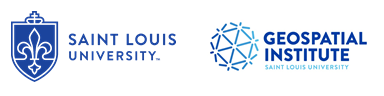

# Assignment 05: Deep Neural Networks in Keras (Part 2B)
## GIS 5092: Applied Machine Learning for GIS and Remote Sensing (Fall 2022)

## Learning Objectives:

* Create neural networks in Keras
* Compare model performance and robustness

# IMPORTANT

## If you are using Google Colab
Whenever you want to keep a copy of this notebook, remember to sign in with your appropriate google account (SLU Google Account is suggested), and save a copy of it in your preferred Google Drive location (preferable location is a seperate folder in your Google Drive for seperate projects, also avoid spaces in folder/file names). Remember to utilize GPU runtime (if needs to use keras). Also remember to pip install necessary packages in every runtime (if needed).

## If you are using Jupyter Notebook
Remember to activate your necessary environment before running codes. Only use Jupyter Notebooks if you are in the lab. If you don't have a GPU machine, then Colab free GPU is suggested.

# How to submit?
Write your answers in code cells with necessary comments. Save a copy of this notebook in your Google Drive / Local Drive by replacing the STUDENT with your SURNAME in CAPS. Upload the completed notebook(s) in Canvas.



---



---



# Data

For this task, you will also have two csvs as datasets. The extracted reflectance csv and the ground truth csv from Part 2A. Bots csvs should have 10,000 samples.

# Your Tasks

1. Read the csvs using <code>pandas</code>.
2. Convert the labels from string class names to some integer codes. You can use the codes provided in Lab 3 or try to use sklearn's [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to do this task.
3. Convert the encoded labels to one hot encoded array (use keras's <code>to_categorical()</code>).
4. Do a 70%-30% train test split.
5. You need to build the following model. Here is the architecture and other requirements:

**DNN**  
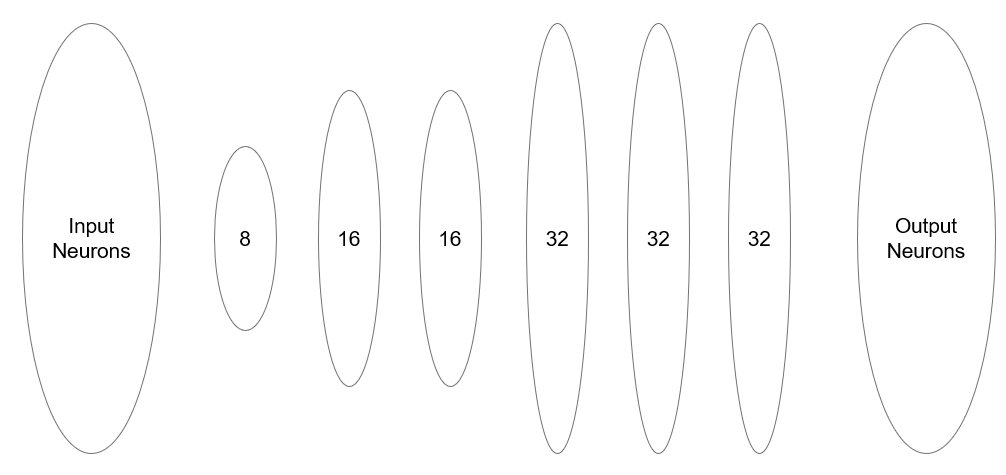

- Use 'categorical_crossentropy' as loss function, 'Adam' as optimizer, 'relu' as intermediate activation functions, 'softmax' as output activation function.
- Start with 0.1 as learning rate, 16 as batch size and 10 as epochs.
- For each model run, get the train-validation loss curve. Tweak around with the learning rate and batch size until you get a reasonable loss curve. No need to change number of epochs if your model converges. If model does not converge (validation loss curve and train loss curve do not meet), then you can increase number of epochs.
- You can increase your learning rates by a factor of 100, e.g., 0.1, 0.01, 0.001, 0.0001, ......
- You can increase batch size in this way: 16, 32, 64 (let's not go beyond 64)
- At least try 5-6 model training with different combinations and note how the loss curve changes with each combination change.
- When you are done with one run (one model fit), for the next run, restart the runtime/kernel before you move on. Do not just overwrite models with different parameters which you may have done in sklearn. Keras DNN models are very heavy with weights so your GPU memory may not handle that. For Jupyter Notebook, restart your kernel by going to Kernel > Restart. For Colab, Runtime > Restart runtime.

**Answer following questions in a word document (name it *lab_5_Part2B_Answers_SURNAME.docx*)**
1. What is the final test accuracy from your best trained model?
2. How many times you trained your model? Provide the loss curve(s) with corresponign learning rate, batch size, epoch information. What change di you notice when you were increasing learning rate? Same question for batch size.
3. What combination of learning rate and batch size you picked as final? Why?

# Deliverables
1. The codes for the tasks in thie notebook. (<code>a5_deep_neural_networks_Part2B_STUDENT.ipynb</code>)
2. The word document file with answers (<code>lab_5_Part2B_Answers_SURNAME.docx</code>)



---



---



# Your Turn

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import os
os.chdir('/content/drive/MyDrive/lab 5')
!pip install geopandas
import pandas as pd
import geopandas as gpd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
reflectance = pd.read_csv('/content/drive/MyDrive/lab 5/reflectance_values.csv')
shapefile = pd.read_csv('/content/drive/MyDrive/lab 5/shapefile.csv')

In [34]:
reflectance

Unnamed: 0    UID      Blue     Green       Red  Red Edge 1  \
0               0      0  0.019811  0.026649  0.023891    0.036442   
1               1      1  0.018713  0.027296  0.027859    0.042098   
2               2      2  0.023131  0.029688  0.039566    0.048880   
3               3      3  0.013423  0.022597  0.026086    0.041704   
4               4      4  0.003630  0.007570  0.003658    0.015224   
...           ...    ...       ...       ...       ...         ...   
99995       99995  99995  0.020317  0.027268  0.036020    0.046910   
99996       99996  99996  0.017475  0.024145  0.033431    0.041845   
99997       99997  99997  0.022034  0.029322  0.038975    0.047389   
99998       99998  99998  0.013451  0.018798  0.023357    0.024989   
99999       99999  99999  0.004587  0.005825  0.002336    0.003968   

       Red Edge 2  Red Edge 3       NIR    SWIR 1    SWIR 2  
0        0.072743    0.088783  0.098295  0.065764  0.041845  
1        0.060474    0.068972  0.074769  0.076458  0.049612  
2        0.055324    0.060558  0.070014  0.101840  0.075163  
3        0.084309    0.098520  0.103810  0.066383  0.036667  
4        0.073644    0.100321  0.108397  0.049893  0.021021  
...           ...         ...       ...       ...       ...  
99995    0.053382    0.061234  0.069141  0.101418  0.076261  
99996    0.049752    0.054958  0.062922  0.072377  0.048205  
99997    0.056956    0.061206  0.069507  0.080594  0.058757  
99998    0.015562    0.015252  0.010750  0.001379  0.001660  
99999    0.000704    0.001463  0.000816  0.000900  0.000591  

[100000 rows x 11 columns]

In [35]:
shapefile

Unnamed: 0    UID        Label  \
0               0      0    Developed   
1               1      1  Agriculture   
2               2      2  Agriculture   
3               3      3    Developed   
4               4      4       Forest   
...           ...    ...          ...   
99995       99995  99995  Agriculture   
99996       99996  99996  Agriculture   
99997       99997  99997  Agriculture   
99998       99998  99998        Water   
99999       99999  99999  Agriculture   

                                            geometry  
0        POINT (303242.3259224463 4213611.454142192)  
1      POINT (292930.34780767746 4296054.5126899425)  
2      POINT (265203.79981731065 4269581.5113771055)  
3        POINT (238300.4254482407 4296996.469392562)  
4       POINT (304097.17126895674 4211128.005572716)  
...                                              ...  
99995   POINT (239809.0334091056 4262490.1961493585)  
99996     POINT (275318.089183392 4217774.322017217)  
99997    POINT (240998.39361120947 4257075.88016049)  
99998    POINT (250105.7127266843 4198845.182263786)  
99999    POINT (208582.9923201073 4251397.535777399)  

[100000 rows x 4 columns]

In [36]:
# We dont need all the columns, lets just keep the ones that we need
ref = reflectance[['UID', 'Blue', 'Green', 'Red', 'Red Edge 1', 'Red Edge 2', 'Red Edge 3', 
                   'NIR', 'SWIR 1', 'SWIR 2']]
ref

UID      Blue     Green       Red  Red Edge 1  Red Edge 2  \
0          0  0.019811  0.026649  0.023891    0.036442    0.072743   
1          1  0.018713  0.027296  0.027859    0.042098    0.060474   
2          2  0.023131  0.029688  0.039566    0.048880    0.055324   
3          3  0.013423  0.022597  0.026086    0.041704    0.084309   
4          4  0.003630  0.007570  0.003658    0.015224    0.073644   
...      ...       ...       ...       ...         ...         ...   
99995  99995  0.020317  0.027268  0.036020    0.046910    0.053382   
99996  99996  0.017475  0.024145  0.033431    0.041845    0.049752   
99997  99997  0.022034  0.029322  0.038975    0.047389    0.056956   
99998  99998  0.013451  0.018798  0.023357    0.024989    0.015562   
99999  99999  0.004587  0.005825  0.002336    0.003968    0.000704   

       Red Edge 3       NIR    SWIR 1    SWIR 2  
0        0.088783  0.098295  0.065764  0.041845  
1        0.068972  0.074769  0.076458  0.049612  
2        0.060558  0.070014  0.101840  0.075163  
3        0.098520  0.103810  0.066383  0.036667  
4        0.100321  0.108397  0.049893  0.021021  
...           ...       ...       ...       ...  
99995    0.061234  0.069141  0.101418  0.076261  
99996    0.054958  0.062922  0.072377  0.048205  
99997    0.061206  0.069507  0.080594  0.058757  
99998    0.015252  0.010750  0.001379  0.001660  
99999    0.001463  0.000816  0.000900  0.000591  

[100000 rows x 10 columns]

In [37]:
shp = shapefile[['UID', 'Label', 'geometry']]
shp

UID        Label                                       geometry
0          0    Developed    POINT (303242.3259224463 4213611.454142192)
1          1  Agriculture  POINT (292930.34780767746 4296054.5126899425)
2          2  Agriculture  POINT (265203.79981731065 4269581.5113771055)
3          3    Developed    POINT (238300.4254482407 4296996.469392562)
4          4       Forest   POINT (304097.17126895674 4211128.005572716)
...      ...          ...                                            ...
99995  99995  Agriculture   POINT (239809.0334091056 4262490.1961493585)
99996  99996  Agriculture     POINT (275318.089183392 4217774.322017217)
99997  99997  Agriculture    POINT (240998.39361120947 4257075.88016049)
99998  99998        Water    POINT (250105.7127266843 4198845.182263786)
99999  99999  Agriculture    POINT (208582.9923201073 4251397.535777399)

[100000 rows x 3 columns]

In [38]:
data = ref.join(shp, on='UID', rsuffix='_')
data

UID      Blue     Green       Red  Red Edge 1  Red Edge 2  \
0          0  0.019811  0.026649  0.023891    0.036442    0.072743   
1          1  0.018713  0.027296  0.027859    0.042098    0.060474   
2          2  0.023131  0.029688  0.039566    0.048880    0.055324   
3          3  0.013423  0.022597  0.026086    0.041704    0.084309   
4          4  0.003630  0.007570  0.003658    0.015224    0.073644   
...      ...       ...       ...       ...         ...         ...   
99995  99995  0.020317  0.027268  0.036020    0.046910    0.053382   
99996  99996  0.017475  0.024145  0.033431    0.041845    0.049752   
99997  99997  0.022034  0.029322  0.038975    0.047389    0.056956   
99998  99998  0.013451  0.018798  0.023357    0.024989    0.015562   
99999  99999  0.004587  0.005825  0.002336    0.003968    0.000704   

       Red Edge 3       NIR    SWIR 1    SWIR 2   UID_        Label  \
0        0.088783  0.098295  0.065764  0.041845      0    Developed   
1        0.068972  0.074769  0.076458  0.049612      1  Agriculture   
2        0.060558  0.070014  0.101840  0.075163      2  Agriculture   
3        0.098520  0.103810  0.066383  0.036667      3    Developed   
4        0.100321  0.108397  0.049893  0.021021      4       Forest   
...           ...       ...       ...       ...    ...          ...   
99995    0.061234  0.069141  0.101418  0.076261  99995  Agriculture   
99996    0.054958  0.062922  0.072377  0.048205  99996  Agriculture   
99997    0.061206  0.069507  0.080594  0.058757  99997  Agriculture   
99998    0.015252  0.010750  0.001379  0.001660  99998        Water   
99999    0.001463  0.000816  0.000900  0.000591  99999  Agriculture   

                                            geometry  
0        POINT (303242.3259224463 4213611.454142192)  
1      POINT (292930.34780767746 4296054.5126899425)  
2      POINT (265203.79981731065 4269581.5113771055)  
3        POINT (238300.4254482407 4296996.469392562)  
4       POINT (304097.17126895674 4211128.005572716)  
...                                              ...  
99995   POINT (239809.0334091056 4262490.1961493585)  
99996     POINT (275318.089183392 4217774.322017217)  
99997    POINT (240998.39361120947 4257075.88016049)  
99998    POINT (250105.7127266843 4198845.182263786)  
99999    POINT (208582.9923201073 4251397.535777399)  

[100000 rows x 13 columns]

In [39]:
data = data[['Label', 'geometry', 'Blue', 'Green', 'Red', 'Red Edge 1', 'Red Edge 2', 'Red Edge 3', 
                   'NIR', 'SWIR 1', 'SWIR 2']]
data

Label                                       geometry      Blue  \
0        Developed    POINT (303242.3259224463 4213611.454142192)  0.019811   
1      Agriculture  POINT (292930.34780767746 4296054.5126899425)  0.018713   
2      Agriculture  POINT (265203.79981731065 4269581.5113771055)  0.023131   
3        Developed    POINT (238300.4254482407 4296996.469392562)  0.013423   
4           Forest   POINT (304097.17126895674 4211128.005572716)  0.003630   
...            ...                                            ...       ...   
99995  Agriculture   POINT (239809.0334091056 4262490.1961493585)  0.020317   
99996  Agriculture     POINT (275318.089183392 4217774.322017217)  0.017475   
99997  Agriculture    POINT (240998.39361120947 4257075.88016049)  0.022034   
99998        Water    POINT (250105.7127266843 4198845.182263786)  0.013451   
99999  Agriculture    POINT (208582.9923201073 4251397.535777399)  0.004587   

          Green       Red  Red Edge 1  Red Edge 2  Red Edge 3       NIR  \
0      0.026649  0.023891    0.036442    0.072743    0.088783  0.098295   
1      0.027296  0.027859    0.042098    0.060474    0.068972  0.074769   
2      0.029688  0.039566    0.048880    0.055324    0.060558  0.070014   
3      0.022597  0.026086    0.041704    0.084309    0.098520  0.103810   
4      0.007570  0.003658    0.015224    0.073644    0.100321  0.108397   
...         ...       ...         ...         ...         ...       ...   
99995  0.027268  0.036020    0.046910    0.053382    0.061234  0.069141   
99996  0.024145  0.033431    0.041845    0.049752    0.054958  0.062922   
99997  0.029322  0.038975    0.047389    0.056956    0.061206  0.069507   
99998  0.018798  0.023357    0.024989    0.015562    0.015252  0.010750   
99999  0.005825  0.002336    0.003968    0.000704    0.001463  0.000816   

         SWIR 1    SWIR 2  
0      0.065764  0.041845  
1      0.076458  0.049612  
2      0.101840  0.075163  
3      0.066383  0.036667  
4      0.049893  0.021021  
...         ...       ...  
99995  0.101418  0.076261  
99996  0.072377  0.048205  
99997  0.080594  0.058757  
99998  0.001379  0.001660  
99999  0.000900  0.000591  

[100000 rows x 11 columns]

In [40]:
# Create a clumn named 'Label_int' which has only 0 as values
data['Label_int'] = 0
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Label                                       geometry      Blue  \
0        Developed    POINT (303242.3259224463 4213611.454142192)  0.019811   
1      Agriculture  POINT (292930.34780767746 4296054.5126899425)  0.018713   
2      Agriculture  POINT (265203.79981731065 4269581.5113771055)  0.023131   
3        Developed    POINT (238300.4254482407 4296996.469392562)  0.013423   
4           Forest   POINT (304097.17126895674 4211128.005572716)  0.003630   
...            ...                                            ...       ...   
99995  Agriculture   POINT (239809.0334091056 4262490.1961493585)  0.020317   
99996  Agriculture     POINT (275318.089183392 4217774.322017217)  0.017475   
99997  Agriculture    POINT (240998.39361120947 4257075.88016049)  0.022034   
99998        Water    POINT (250105.7127266843 4198845.182263786)  0.013451   
99999  Agriculture    POINT (208582.9923201073 4251397.535777399)  0.004587   

          Green       Red  Red Edge 1  Red Edge 2  Red Edge 3       NIR  \
0      0.026649  0.023891    0.036442    0.072743    0.088783  0.098295   
1      0.027296  0.027859    0.042098    0.060474    0.068972  0.074769   
2      0.029688  0.039566    0.048880    0.055324    0.060558  0.070014   
3      0.022597  0.026086    0.041704    0.084309    0.098520  0.103810   
4      0.007570  0.003658    0.015224    0.073644    0.100321  0.108397   
...         ...       ...         ...         ...         ...       ...   
99995  0.027268  0.036020    0.046910    0.053382    0.061234  0.069141   
99996  0.024145  0.033431    0.041845    0.049752    0.054958  0.062922   
99997  0.029322  0.038975    0.047389    0.056956    0.061206  0.069507   
99998  0.018798  0.023357    0.024989    0.015562    0.015252  0.010750   
99999  0.005825  0.002336    0.003968    0.000704    0.001463  0.000816   

         SWIR 1    SWIR 2  Label_int  
0      0.065764  0.041845          0  
1      0.076458  0.049612          0  
2      0.101840  0.075163          0  
3      0.066383  0.036667          0  
4      0.049893  0.021021          0  
...         ...       ...        ...  
99995  0.101418  0.076261          0  
99996  0.072377  0.048205          0  
99997  0.080594  0.058757          0  
99998  0.001379  0.001660          0  
99999  0.000900  0.000591          0  

[100000 rows x 12 columns]

In [41]:
for i in range(data.shape[0]):
    label_txt = data.iloc[i, 0]
    
    if label_txt=='Water':
        data.iloc[i, -1] = 1
    elif label_txt=='Wetland':
        data.iloc[i, -1] = 2
    elif label_txt=='Developed':
        data.iloc[i, -1] = 3
    elif label_txt=='Forest':
        data.iloc[i, -1] = 4
    elif label_txt=='Agriculture':
        data.iloc[i, -1] = 5
    elif label_txt=='Barren':
        data.iloc[i, -1] = 6
    elif label_txt=='Herbaceous':
        data.iloc[i, -1] = 7
    elif label_txt=='Shrubland':
        data.iloc[i, -1] = 8
        
data

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Label                                       geometry      Blue  \
0        Developed    POINT (303242.3259224463 4213611.454142192)  0.019811   
1      Agriculture  POINT (292930.34780767746 4296054.5126899425)  0.018713   
2      Agriculture  POINT (265203.79981731065 4269581.5113771055)  0.023131   
3        Developed    POINT (238300.4254482407 4296996.469392562)  0.013423   
4           Forest   POINT (304097.17126895674 4211128.005572716)  0.003630   
...            ...                                            ...       ...   
99995  Agriculture   POINT (239809.0334091056 4262490.1961493585)  0.020317   
99996  Agriculture     POINT (275318.089183392 4217774.322017217)  0.017475   
99997  Agriculture    POINT (240998.39361120947 4257075.88016049)  0.022034   
99998        Water    POINT (250105.7127266843 4198845.182263786)  0.013451   
99999  Agriculture    POINT (208582.9923201073 4251397.535777399)  0.004587   

          Green       Red  Red Edge 1  Red Edge 2  Red Edge 3       NIR  \
0      0.026649  0.023891    0.036442    0.072743    0.088783  0.098295   
1      0.027296  0.027859    0.042098    0.060474    0.068972  0.074769   
2      0.029688  0.039566    0.048880    0.055324    0.060558  0.070014   
3      0.022597  0.026086    0.041704    0.084309    0.098520  0.103810   
4      0.007570  0.003658    0.015224    0.073644    0.100321  0.108397   
...         ...       ...         ...         ...         ...       ...   
99995  0.027268  0.036020    0.046910    0.053382    0.061234  0.069141   
99996  0.024145  0.033431    0.041845    0.049752    0.054958  0.062922   
99997  0.029322  0.038975    0.047389    0.056956    0.061206  0.069507   
99998  0.018798  0.023357    0.024989    0.015562    0.015252  0.010750   
99999  0.005825  0.002336    0.003968    0.000704    0.001463  0.000816   

         SWIR 1    SWIR 2  Label_int  
0      0.065764  0.041845          3  
1      0.076458  0.049612          5  
2      0.101840  0.075163          5  
3      0.066383  0.036667          3  
4      0.049893  0.021021          4  
...         ...       ...        ...  
99995  0.101418  0.076261          5  
99996  0.072377  0.048205          5  
99997  0.080594  0.058757          5  
99998  0.001379  0.001660          1  
99999  0.000900  0.000591          5  

[100000 rows x 12 columns]

In [42]:
descriptive_stat = data.describe()
descriptive_stat

Blue         Green           Red    Red Edge 1    Red Edge 2  \
count  99999.000000  99999.000000  99999.000000  99998.000000  99918.000000   
mean       0.015117      0.022463      0.021801      0.035235      0.069227   
std        0.010710      0.011194      0.015990      0.014437      0.023955   
min        0.001463      0.000985      0.000450      0.000028      0.000028   
25%        0.007429      0.014886      0.007598      0.024482      0.053720   
50%        0.013901      0.021612      0.019811      0.034500      0.071055   
75%        0.019895      0.027409      0.032277      0.043505      0.087123   
max        0.245132      0.242318      0.246539      0.260215      0.245695   

         Red Edge 3           NIR        SWIR 1        SWIR 2     Label_int  
count  99927.000000  99918.000000  99999.000000  99998.000000  100000.00000  
mean       0.082859      0.088799      0.066350      0.041355       4.19959  
std        0.031643      0.032966      0.022710      0.020477       1.12011  
min        0.000028      0.000028      0.000141      0.000028       1.00000  
25%        0.059995      0.066580      0.055409      0.025073       4.00000  
50%        0.082649      0.088502      0.067143      0.040241       5.00000  
75%        0.109298      0.116136      0.078259      0.054339       5.00000  
max        0.249381      0.238997      0.311796      0.347169       8.00000

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import activations

In [44]:
import matplotlib.pyplot as plt

In [45]:
#data = data.drop(columns=['Label_int'])
data = data.drop(columns=['Label'])
data = data.drop(columns=['geometry'])
data

Blue     Green       Red  Red Edge 1  Red Edge 2  Red Edge 3  \
0      0.019811  0.026649  0.023891    0.036442    0.072743    0.088783   
1      0.018713  0.027296  0.027859    0.042098    0.060474    0.068972   
2      0.023131  0.029688  0.039566    0.048880    0.055324    0.060558   
3      0.013423  0.022597  0.026086    0.041704    0.084309    0.098520   
4      0.003630  0.007570  0.003658    0.015224    0.073644    0.100321   
...         ...       ...       ...         ...         ...         ...   
99995  0.020317  0.027268  0.036020    0.046910    0.053382    0.061234   
99996  0.017475  0.024145  0.033431    0.041845    0.049752    0.054958   
99997  0.022034  0.029322  0.038975    0.047389    0.056956    0.061206   
99998  0.013451  0.018798  0.023357    0.024989    0.015562    0.015252   
99999  0.004587  0.005825  0.002336    0.003968    0.000704    0.001463   

            NIR    SWIR 1    SWIR 2  Label_int  
0      0.098295  0.065764  0.041845          3  
1      0.074769  0.076458  0.049612          5  
2      0.070014  0.101840  0.075163          5  
3      0.103810  0.066383  0.036667          3  
4      0.108397  0.049893  0.021021          4  
...         ...       ...       ...        ...  
99995  0.069141  0.101418  0.076261          5  
99996  0.062922  0.072377  0.048205          5  
99997  0.069507  0.080594  0.058757          5  
99998  0.010750  0.001379  0.001660          1  
99999  0.000816  0.000900  0.000591          5  

[100000 rows x 10 columns]

In [46]:
X = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 9)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
from sklearn.model_selection import train_test_split

labint = data['Label_int']

X_train, X_test, y_train, y_test = train_test_split(X, labint, test_size=0.3, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(len(X))

70000
30000
70000
30000
100000


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model1 = Sequential([
  Dense(8, activation='relu'),
  Dense(16, activation='relu'),
  Dense(16, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='softmax'),
])
#model1.add(Flatten())
model1.compile(
  optimizer= Adam(learning_rate = 0.1),
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'],
)

X_train = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
y_train = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
X_test = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
y_test = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)

history1 = model1.fit(
  X_train, # training data
  y_train, # training targets
  epochs = 10,
  batch_size = 16,
  validation_data = (X_test, y_test)
)

Epoch 1/10
6250/6250 [==============================] - 35s 6ms/step - loss: 1.2845 - accuracy: 0.5397 - val_loss: 1.2884 - val_accuracy: 0.5404
Epoch 2/10
6250/6250 [==============================] - 26s 4ms/step - loss: 1.2812 - accuracy: 0.5404 - val_loss: 1.2848 - val_accuracy: 0.5404
Epoch 3/10
6250/6250 [==============================] - 27s 4ms/step - loss: 1.2813 - accuracy: 0.5404 - val_loss: 1.2744 - val_accuracy: 0.5404
Epoch 4/10
6250/6250 [==============================] - 39s 6ms/step - loss: 1.2815 - accuracy: 0.5404 - val_loss: 1.2777 - val_accuracy: 0.5404
Epoch 5/10
6250/6250 [==============================] - 37s 6ms/step - loss: 1.2814 - accuracy: 0.5404 - val_loss: 1.2762 - val_accuracy: 0.5404
Epoch 6/10
6250/6250 [==============================] - 37s 6ms/step - loss: 1.2814 - accuracy: 0.5404 - val_loss: 1.2917 - val_accuracy: 0.5404
Epoch 7/10
6250/6250 [==============================] - 26s 4ms/step - loss: 1.2810 - accuracy: 0.5404 - val_loss: 1.2728 - val_ac

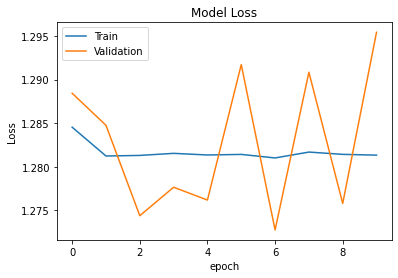

In [58]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [50]:
model2 = Sequential([
  Dense(8, activation='relu'),
  Dense(16, activation='relu'),
  Dense(16, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='softmax'),
])

model2.compile(
  optimizer= Adam(learning_rate = 0.01),
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'],
)

X_train = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
y_train = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
X_test = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
y_test = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)

history2 = model2.fit(
  X_train, # training data
  y_train, # training targets
  epochs = 15,
  batch_size = 32,
  validation_data = (X_test, y_test)
)

Epoch 1/15
3125/3125 [==============================] - 14s 4ms/step - loss: 0.0189 - accuracy: 0.9954 - val_loss: 6.6491e-07 - val_accuracy: 1.0000
Epoch 2/15
3125/3125 [==============================] - 19s 6ms/step - loss: 2.5476e-07 - accuracy: 1.0000 - val_loss: 6.2177e-08 - val_accuracy: 1.0000
Epoch 3/15
3125/3125 [==============================] - 19s 6ms/step - loss: 2.9647e-08 - accuracy: 1.0000 - val_loss: 1.5128e-08 - val_accuracy: 1.0000
Epoch 4/15
3125/3125 [==============================] - 14s 4ms/step - loss: 0.0159 - accuracy: 0.9982 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/15
3125/3125 [==============================] - 13s 4ms/step - loss: 1.4384e-04 - accuracy: 1.0000 - val_loss: 5.9041e-06 - val_accuracy: 1.0000
Epoch 6/15
3125/3125 [==============================] - 13s 4ms/step - loss: 2.4376e-06 - accuracy: 1.0000 - val_loss: 7.5697e-07 - val_accuracy: 1.0000
Epoch 7/15
3125/3125 [==============================] - 13s 4ms/step - loss: 3.5796e-07 - accu

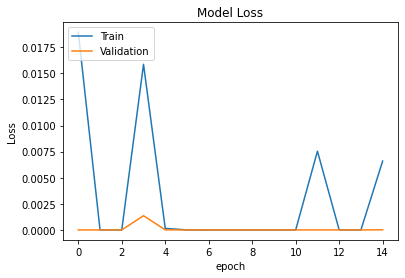

In [59]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
model3 = Sequential([
  Dense(8, activation='relu'),
  Dense(16, activation='relu'),
  Dense(16, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='softmax'),
])

model3.compile(
  optimizer= Adam(learning_rate = 0.001),
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'],
)

X_train = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
y_train = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
X_test = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
y_test = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)

history3 = model3.fit(
  X_train, # training data
  y_train, # training targets
  epochs = 10,
  batch_size = 64,
  validation_data = (X_test, y_test)
)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1796 - accuracy: 0.9599 - val_loss: 2.1174e-04 - val_accuracy: 1.0000
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 6.9330e-05 - accuracy: 1.0000 - val_loss: 2.0993e-05 - val_accuracy: 1.0000
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1366e-05 - accuracy: 1.0000 - val_loss: 5.6647e-06 - val_accuracy: 1.0000
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.4143e-06 - accuracy: 1.0000 - val_loss: 1.9360e-06 - val_accuracy: 1.0000
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1977e-06 - accuracy: 1.0000 - val_loss: 6.6411e-07 - val_accuracy: 1.0000
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 4.6692e-07 - accuracy: 1.0000 - val_loss: 2.2798e-07 - val_accuracy: 1.0000
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5255e-07 - a

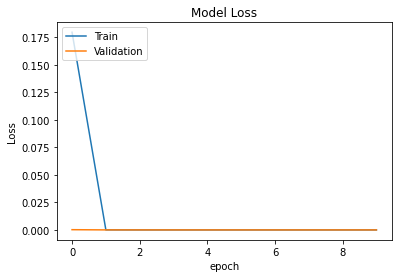

In [60]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [54]:
model4 = Sequential([
  Dense(8, activation='relu'),
  Dense(16, activation='relu'),
  Dense(16, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='softmax'),
])

model4.compile(
  optimizer= Adam(learning_rate = 0.0001),
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'],
)

X_train = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
y_train = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
X_test = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
y_test = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)

history4 = model4.fit(
  X_train, # training data
  y_train, # training targets
  epochs = 20,
  batch_size = 32,
  validation_data = (X_test, y_test)
)

Epoch 1/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6898 - accuracy: 0.8990 - val_loss: 0.0220 - val_accuracy: 0.9965
Epoch 2/20
3125/3125 [==============================] - 20s 6ms/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0040 - val_accuracy: 0.9988
Epoch 3/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.6544e-04 - val_accuracy: 1.0000
Epoch 4/20
3125/3125 [==============================] - 19s 6ms/step - loss: 9.7801e-05 - accuracy: 1.0000 - val_loss: 2.5433e-05 - val_accuracy: 1.0000
Epoch 5/20
3125/3125 [==============================] - 14s 4ms/step - loss: 1.0954e-05 - accuracy: 1.0000 - val_loss: 3.4535e-06 - val_accuracy: 1.0000
Epoch 6/20
3125/3125 [==============================] - 14s 4ms/step - loss: 1.5579e-06 - accuracy: 1.0000 - val_loss: 5.0462e-07 - val_accuracy: 1.0000
Epoch 7/20
3125/3125 [==============================] - 15s 5ms/step - loss: 2.3073e-07 - accuracy: 1.

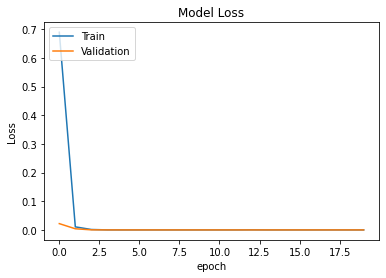

In [61]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [56]:
model5 = Sequential([
  Dense(8, activation='relu'),
  Dense(16, activation='relu'),
  Dense(16, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='softmax'),
])

model5.compile(
  optimizer= Adam(learning_rate = 0.00001),
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'],
)

X_train = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
y_train = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
X_test = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)
y_test = tf.keras.utils.to_categorical(data['Label_int'], num_classes = 32)

history5 = model5.fit(
  X_train, # training data
  y_train, # training targets
  epochs = 25,
  batch_size = 16,
  validation_data = (X_test, y_test)
)

Epoch 1/25
6250/6250 [==============================] - 27s 4ms/step - loss: 2.9126 - accuracy: 0.5298 - val_loss: 1.7974 - val_accuracy: 0.9062
Epoch 2/25
6250/6250 [==============================] - 26s 4ms/step - loss: 1.0234 - accuracy: 0.7462 - val_loss: 0.6291 - val_accuracy: 0.7411
Epoch 3/25
6250/6250 [==============================] - 37s 6ms/step - loss: 0.4183 - accuracy: 0.8821 - val_loss: 0.2505 - val_accuracy: 0.9566
Epoch 4/25
6250/6250 [==============================] - 39s 6ms/step - loss: 0.1594 - accuracy: 0.9734 - val_loss: 0.0940 - val_accuracy: 0.9906
Epoch 5/25
6250/6250 [==============================] - 37s 6ms/step - loss: 0.0639 - accuracy: 0.9906 - val_loss: 0.0436 - val_accuracy: 0.9906
Epoch 6/25
6250/6250 [==============================] - 27s 4ms/step - loss: 0.0339 - accuracy: 0.9906 - val_loss: 0.0266 - val_accuracy: 0.9906
Epoch 7/25
6250/6250 [==============================] - 27s 4ms/step - loss: 0.0218 - accuracy: 0.9908 - val_loss: 0.0176 - val_ac

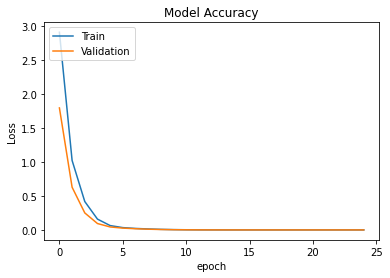

In [62]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()